# Regression

## Machine learning

### 1. Supervised learning
Where we use input data to predict a label for that data
* Using credit card transaction data to predict fraudulent transactions;
* Using customer financial data to predict the chance of a default on a loan;
* Using neighborhood characteristics to predict home prices.

**Linear and logistic regression fall into here.**

### 2. Unsupervised learning
Clustering together data based on common characteristics (these data don't have labels like in supervised ML techniques)
* Trying to group similar customer segments;
* Group documents that cover similar topics.
---

## Linear regression introduction

### a) Simple linear regression
The most simple form of regression. A linear comparison of only two quantitative variables.
* *Prices* x **sales**;
* *Temperature* x **humidity**;
* *Height* x **weight**;
* *Hours studying* x **test grade**.

A common way to visualize these relationships is with a scatter plot. The variable on the $Y$ axis is called *the response* or *dependent*, where the variable on the $X$ axis is called *explanatory* or *independent*
* $Response$ $variable$ $(Y):$ the variable we're interested in predict;
* $Explanatory$ $variable$ $(X):$ the variable used to predict the response.

The **scatter plot** can be used to visualize both the strength and the direction of the relationship between two variables.
* Positive relation: when both variables increases.
* Negative relation: when one variable increases and the other decreases.
* As the points spread out from one another this weakens the relationship.
* To identify strong or weak relationships, we aren't so much looking at the slope associated with the relationship.
* Generally, we consider strength as either weak, moderate or strong. And direction as positive or negative.

[$Correlation$ $coeficient$ $of$ $Pearson$ $(r)$](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) is the strength and direction of a linear relationship, always between -1 and 1, where the closer it is to 1 or -1, the stronger the relationship. Negative values indicate negative relationship, otherwise positive relationship.

**Ps.:** [Spearman coeficient](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman) is[ more indicated for specific cases with two variables (more options](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_postos_de_Spearman)).

---

## Correlation coeficients
There is some rules, but this is a highly field-dependent measure.
* **Strong relationship:** 0.7 <= |r| < 1;
* **Moderate relationship:** 0.3 <= |r| < 0.7;
* **Weak relationship:** 0.0 <= |r| < 0.3.

**Ps.:** Negative correlation coeficient don't indicate a weak relationship.

**Ps2.:** On excel the function is `CORREL(col1, col2)` ([example](https://docs.google.com/spreadsheets/d/1bZs0QjX0d_TKeLcbBZKwLq9mCE5Gpgq0XrliVeq_FZg/edit#gid=0))

---

## What defines a line?
We define it by two values, an intercept and a slope.
* **Intercept** tells us the predicted value of the response when the explanatory variable is zero. Commonly used for the population and sample intercept values, pronouced  beta knot for the parameter and B0 for statistic.
* **Slope ($\beta_1$)** tells us the predicted change in the response for each additional one unit increase in the explanatory variable ($X$). For parameter is beta one and b1 for the statistic

Once we've fit a line to these points, we define with this equation

$ŷ$ $=$ $b0$ $+$ $b1x$

* $b0$ is where the x value is equal to zero;
* $b1$ is the change along the y-axis in the line;
* $ŷ$ define the values that we get from the fitted line (predicted result);
* $y$ defines the actual data points (actualresult);


Values out of the line are define line e $(x1,y1)$, but values in the line are define positions like $(x1,ŷ1)$

---

## Fitting a regression line
In bi-variate case, we're interested in fiding a line that best allows us to predict the response variable (y) using the explanatory variable (x).
The main algorith used to find the best line is  the **least squares regression algorithm** and the way the line is chosen is by minimizing the sum of squared vertical distances between our fitted line and each of these points
To calculate the difference between the point and the arrow: $y1$ $-$ $ŷ1$.
For each of the data points in the data set, look at the distance between the predicted and actual values, square these, and them sum them all together.

$\sum_{i=1}^{x}$ $(yi$ $-$ $ŷi)^2$

And if our line creates a smaller value than for any other line, then this is the line we want to use.

* [Another video about linear regressionan analysis intro](https://www.youtube.com/watch?v=zPG4NjIkCjc)

To calculate the intercept we need to known:

$\bar{x}$ $=$ $\frac{1}{n}$ $\sum$ $x_i$

$\bar{y}$ $=$ $\frac{1}{n}$ $\sum$ $y_i$

$s_y$ $=$ $\sqrt{\frac{1}{n=1}\sum(y_i-\bar{y})²}$

$s_x$ $=$ $\sqrt{\frac{1}{n=1}\sum(x_i-\bar{x})²}$

$r$ $=$ $\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum(x_i-\bar{x})²}{\sqrt{\sum(y_i-\bar{y})^2}}}$

$b_1$ $=$ $r_\frac{s_y}{s_x}$

$b_0$ $=$ $\bar{y}-b_1\bar{x}$

## Fitting a regression line in python

### Housing Analysis

In this notebook, you will be replicating much of what you saw in this lesson using the housing data shown below.

After you complete this notebook and the set of quizzes that follow, you will be set to try out your skills on a couple new datasets to gain some additional practice.  **Ignore the warning message**.


`1.` Use the documentation [here](http://www.statsmodels.org/dev/regression.html) and the **statsmodels** library to fit a linear model to predict **price** based on **area**.  Obtain a summary of the results, and use them to answer the following quiz questions. Don't forget to add an intercept.

In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('house_price_area_only.csv')
df.head()

,price,area
0,598291,1188
1,1744259,3512
2,571669,1134
3,493675,1940
4,1101539,2208


In [2]:
# Add column to intercept result, statsmodels doesn't do this
df['intercept'] = 1
df.head()

,price,area,intercept
0,598291,1188,1
1,1744259,3512,1
2,571669,1134,1
3,493675,1940,1
4,1101539,2208,1


* There are only rare cases where add intercept is not necessary ([link discussion](https://stats.stackexchange.com/questions/7948/when-is-it-ok-to-remove-the-intercept-in-a-linear-regression-model))

In [3]:
# Provide to OLS method the Y and X variables
lm = sm.OLS(df['price'], df[['intercept', 'area']])
# Fit the model
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                 1.269e+04
Date:                Tue, 15 Jan 2019   Prob (F-statistic):               0.00
Time:                        19:19:40   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6026   BIC:                         1.691e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   9587.8878   7637.479      1.255      0.209   -5384.303    2.46e+04
area         348.4664      3.093    112.662      0.000     342.403     354.530
==============================================================================
Omnibus:                      368.609   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              349.279
Skew:                           0.534   Prob(JB):                     1.43e-76
Kurtosis:                       2.499   Cond. No.                     4.93e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* intercept ($b_0$) = 9587.8878	
* slope ($b_1$) = 348.4664	
* predicted home price (y) is $ŷ=b_0+b_1x$ (x=home area)
$ŷ=9588+348x$

In regression, p-values are always given for testing if the parameter for the intercept of the slope are equal to zero and he nulll hypothesis

for intercept p-value 0.209 the $H_0=\beta_0=0$ and $H_1:\beta_0!=0$

for area (slope) p-value of 0.000 the $H_0:\beta_1=0$ and $H1:\beta!=0$, which suggests that the area is statistically significant in relatin to the price.

## How do we know if our model fits well?
One of the most common techniques for understanding the relaionship between two variables in regression is the **correlation coefficient** 
* **R-Squared value:** The amount of variability in the response (Y) explained by your model (explanatory variable). The square of the correlation coeficient ($r^2$). The closer this value to 1 the better the model fits, and closer to 0 the worst the model fits.
    * R-squered=0.678 indicates that 67.8% of the variability in price is explained by the area of the house. The remaining 33% of the variability, is due to characteristics of the home that are not the area.
* [Is R-squared useless?](https://data.library.virginia.edu/is-r-squared-useless/)

---

### Regression Carats vs. Price

In this notebook, you will perform a similar analysis to the one you did in the previous notebook, but using a dataset holding the weight of a diamond in carats, and the price of the corresponding diamond in dollars.

To get started, let's read in the necessary libraries and the dataset.


In [6]:
df = pd.read_csv('carats.csv', header=None)
df.columns = ['carats', 'price']
df.head()

,carats,price
0,0.17,355
1,0.16,328
2,0.17,350
3,0.18,325
4,0.25,642


`1.` Similar to the last notebook, fit a simple linear regression model to predict price based on the weight of a diamond.  Use your results to answer the first question below.  Don't forget to add an intercept.

In [15]:
df['intercept'] = 1
lm = sm.OLS(df['price'],df[['carats', 'intercept']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           6.75e-40
Time:                        19:57:04   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carats      3721.0249     81.786     45.497      0.000    3556.398    3885.651
intercept   -259.6259     17.319    -14.991      0.000    -294.487    -224.765
==============================================================================
Omnibus:                        0.739   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.691   Jarque-Bera (JB):                0.181
Skew:                           0.056   Prob(JB):                        0.913
Kurtosis:                       3.280   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

`2.` Use [scatter](https://matplotlib.org/gallery/lines_bars_and_markers/scatter_symbol.html?highlight=scatter%20symbol) to create a scatterplot of the relationship between price and weight.  Then use the scatterplot and the output from your regression model to answer the second quiz question below.

Text(0.5,1,'Price vs. Carats')

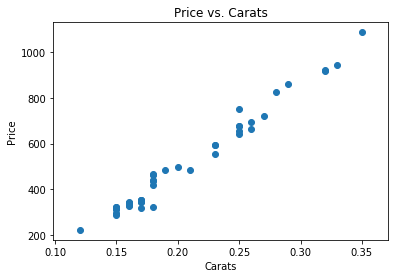

In [14]:
plt.scatter(df['carats'], df['price']);
plt.xlabel('Carats');
plt.ylabel('Price');
plt.title('Price vs. Carats')

In [18]:
# Para cada aumento de 0.01 (quilate) no tamanho do quilate, podemos esperar um aumento de ___ dólares.
3721.0249*0.01
# A _% da variação de preço pode ser explicada pelos tamanhos dos diamantes.
# R-squared = 0.978
# Há __ diamantes no conjunto de dados.
# No. Observations: 48

37.210249

In [19]:
# Usando o R squared (R ao quadrado) e a relação vista no gráfico de 
# dispersão, qual é o valor do coeficiente de correlação?
np.sqrt(0.978)

0.9889388252060892

## Homes vs. Crime


In [20]:
from sklearn.datasets import load_boston

boston_data = load_boston()
df = pd.DataFrame()
df['MedianHomePrice'] = boston_data.target
df2 = pd.DataFrame(boston_data.data)
df['CrimePerCapita'] = df2.iloc[:,0];
df.head()

,MedianHomePrice,CrimePerCapita
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


The Boston housing data is a built in dataset in the sklearn library of python.  You will be using two of the variables from this dataset, which are stored in **df**. The median home price in thousands of dollars and the crime per capita in the area of the home are shown above.

`1.` Use this dataframe to fit a linear model to predict the home price based on the crime rate.  Use your output to answer the first quiz below. Don't forget an intercept.

In [23]:
df['intercept'] = 1
lm = sm.OLS(df['MedianHomePrice'], df[['CrimePerCapita', 'intercept']])
result = lm.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        MedianHomePrice   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     88.15
Date:                Tue, 15 Jan 2019   Prob (F-statistic):           2.08e-19
Time:                        20:07:32   Log-Likelihood:                -1799.5
No. Observations:                 506   AIC:                             3603.
Df Residuals:                     504   BIC:                             3611.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
CrimePerCapita    -0.4128      0.044     -9.389      0.000      -0.499      -0.326
intercept         24.0162      0.409     58.676      0.000      23.212      24.820
==============================================================================
Omnibus:                      138.965   Durbin-Watson:                   0.712
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              292.343
Skew:                           1.483   Prob(JB):                     3.30e-64
Kurtosis:                       5.251   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'MedianHomePrice vs. CrimePerCapita')

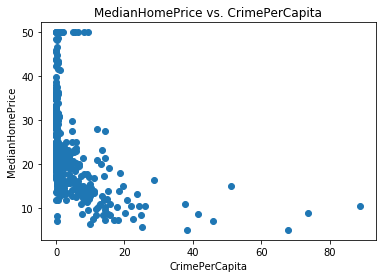

In [24]:
plt.scatter(df['CrimePerCapita'], df['MedianHomePrice']);
plt.xlabel('CrimePerCapita');
plt.ylabel('MedianHomePrice');
plt.title('MedianHomePrice vs. CrimePerCapita')

In [25]:
# Para cada aumento de 100% em crime per capita, a diminuição esperada 
# no preço prédio de moradia é de ___ dólares.
-0.4128*1000

-412.8

In [26]:
# Se não houvesse crime, o preço médio de moradia seria de __ dólares.
24.0162*1000

24016.2

In [27]:
# __% da variação no preço pode ser explicada pelo crime per capita.
0.149*100

14.899999999999999

In [28]:
# O valor-p de __ associado ao crime per capita indica que ele 
# é estatisticamente significante ao prover informações 
# sobre a previsão de valores médios de moradia.
0.000

0.0

In [31]:
# qual deve ser o valor do coeficiente de correlação?
-np.sqrt(0.149)

-0.38600518131237566

1. Regressão linear simples é sobre a construção de uma linha que modela o relacionamento entre duas variáveis quantitativas.
2. Aprendendo sobre coeficientes de correlação. Você aprendeu que se trata de uma medida que pode informar para você a força e direção de uma relação linear. 
3. A maneira mais comum de visualizar a regressão linear simples é usar um gráfico de dispersão. 
4. Uma linha é definida por um intercepto e uma inclinação, que você encontra usando a biblioteca statsmodels em Python.
5. Você aprendeu as interpretações para os valores de inclinação, intercepto e R quadrado.

---

## Multiple linear regression introduction
We can use linear algebra to predict the **$Y$** value using all multi-column at the same time. The way we do this is by creating a matrix of inputs, and we create a vector of the response that we want to predict. The matrix with the multiple column is denoted **$Y$** (capital x bold) while the vector for the response is denoted **$y$** (y bold)
* [Linear algebra from Khan academy](https://www.khanacademy.org/math/linear-algebra)